# Random Forest x IRIS 

In [153]:
import numpy as np
import pandas as pd
# importing machine learning models for prediction
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics



### Importer le dataset IRIS 

In [164]:
df= pd.read_csv('iris.csv')
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Faite un dataFrame et renommer les colonnes 

In [165]:
from sklearn.preprocessing import LabelEncoder
sepal_length_label_encoder = LabelEncoder()
petal_width_label_encoder=LabelEncoder()

df.petal_width =petal_width_label_encoder.fit_transform(df.petal_width)
df.sepal_width=sepal_width_label_encoder.fit_transform(df.sepal_width)
petal_length_label_encoder,petal_width_label_encoder,species_label_encoder = LabelEncoder(), LabelEncoder(), LabelEncoder(),

df.petal_length=petal_length_label_encoder.fit_transform(df.petal_length)
df.sepal_length=sepal_length_label_encoder.fit_transform(df.sepal_length)

df.species =species_label_encoder.fit_transform(df.species)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0


### Définir les variables features et la target & effectuer un split 

In [158]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [166]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(df[features], y, test_size = 0.20)

### Entrainer le classifieur 

In [167]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

### Afficher l'accuracy de votre classifieurs 

In [168]:
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Analyser votre classifieur, que voyez vous ? 

In [86]:
 Accuracy est trés proche de 1, nous pouvons générer un modèle à partir des features les plus intuitives.

### Afficher les features importances

In [145]:
feature_imp =clf.feature_importances_
print(feature_imp)
df_featimp = pd.DataFrame(feature_imp, columns = {"Feature Importance"})
df_featimp["Feature Name"] = X_train.columns
df_featimp = df_featimp.sort_values(by="Feature Importance", ascending=False)
print(df_featimp)

[0.11781665 0.02716299 0.42647584 0.42854452]
   Feature Importance  Feature Name
3            0.428545   petal_width
2            0.426476  petal_length
0            0.117817  sepal_length
1            0.027163   sepal_width


### Afficher graphiquement les features importances  

<AxesSubplot:title={'center':'Feature importance'}, ylabel='Feature Name'>

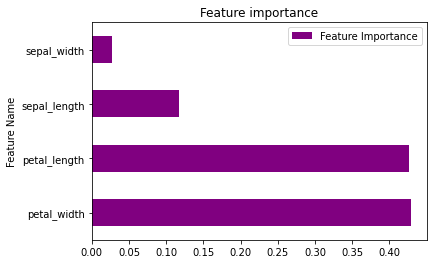

In [169]:
# Creating a bar plot
df_featimp.plot.barh(y="Feature Importance", x="Feature Name", title="Feature importance", color="purple")

### Entrainer votre classifieurs avec moins de features

In [170]:
# Split dataset into features and labels
features = ['sepal_length', 'petal_length', 'petal_width'] # Removed feature "sepal width"
target = ['species']                                     
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3)
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


C:\Users\smatn\AppData\Local\Temp\ipykernel_2960\2735072088.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier()

In [171]:
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


### Que constatez vous ? 

C’est les variables « petal_width » et « petal_length »qui sont à l’origine de ce score.
On remarque que les dimensions de la petale qui aident à la décision.